In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
x = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [32]:
y = dataset['target']

In [33]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

In [37]:
y_pred = model.predict(x_test)

In [38]:
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
r2_score(y_test, y_pred)

0.004112862716864951

In [40]:
mean_squared_error(y_test, y_pred)

5376.105263157895

In [41]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(144, 144))

In [42]:
# Hyperparameter tuning

In [43]:
params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter' : ['random', 'best'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto', 'sqrt', 'log2'],
    
}

In [44]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [45]:
grid.fit(x_train, y_train)

H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "H:\Python-all-in-one\ML-algorithams\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_par

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='neg_mean_squared_error')

In [46]:
y_pred = grid.predict(x_test)

In [47]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [48]:
grid.best_score_

np.float64(-4272.144607297386)

In [55]:
r2_score(y_test, y_pred)

0.34448819473675907

In [56]:
mean_squared_error(y_test, y_pred)

3538.654466360404

[Text(0.5890488347909556, 0.9722222222222222, 'x[2] <= 0.005\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.338567219496587, 0.9166666666666666, 'x[8] <= 0.014\nsquared_error = 3636.316\nsamples = 183\nvalue = 118.355'),
 Text(0.46380802714377134, 0.9444444444444444, 'True  '),
 Text(0.21126413182593856, 0.8611111111111112, 'x[5] <= 0.091\nsquared_error = 2641.993\nsamples = 138\nvalue = 102.855'),
 Text(0.16391584897610922, 0.8055555555555556, 'x[8] <= -0.043\nsquared_error = 2392.062\nsamples = 136\nvalue = 100.816'),
 Text(0.07945819112627986, 0.75, 'x[4] <= -0.039\nsquared_error = 1519.474\nsamples = 42\nvalue = 78.952'),
 Text(0.05482081911262798, 0.6944444444444444, 'x[4] <= -0.046\nsquared_error = 1850.165\nsamples = 24\nvalue = 94.792'),
 Text(0.037969283276450515, 0.6388888888888888, 'x[0] <= -0.0\nsquared_error = 1134.5\nsamples = 20\nvalue = 82.0'),
 Text(0.024744027303754267, 0.5833333333333334, 'x[6] <= 0.036\nsquared_error = 756.596\nsamples = 15\nva

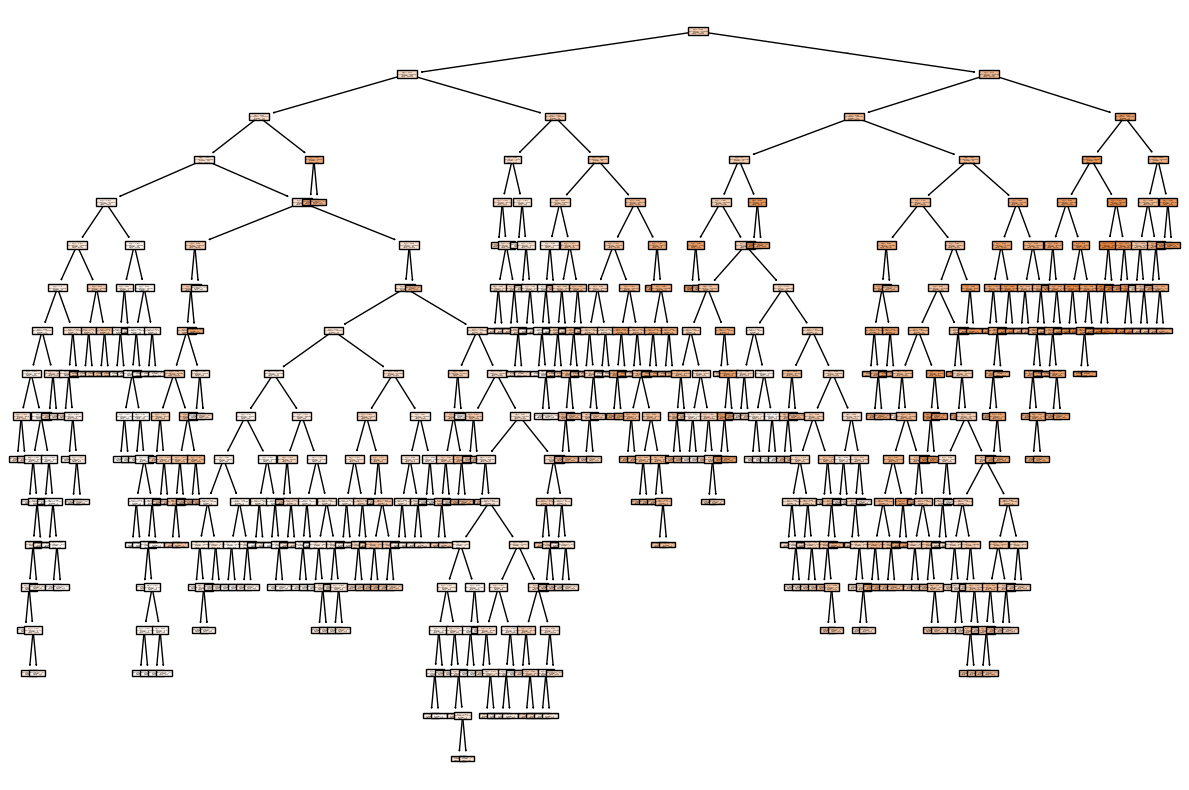

In [57]:
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(model, filled=True)